# Módulo 1 - Desafio

Esse notebook se refere ao primeiro módulo do bootcamp ciência de dados e tem como objetivo responder ao **primeiro desafio proposto**. 

## 1.1 Análise exploratória de dados

* Os gráficos da análise exploratória originalmente foram criados no PowerBI e por conveniência plotados nesse notebook, respondendo as questões específicas do trabalho prático

* Para a análise carregaremos apenas alguma colunas: Age, Age1stCode, ConvertedComp, Country, EdLevel, JobSat, OpSys e YearsCode.

In [10]:
# Importando as Bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
from datetime import datetime
sns.set_theme(style="white")

In [6]:
#Importando o dataset
df = pd.read_csv('survey_results_public.csv',encoding='UTF-8',sep=',',
usecols=["Age", "Age1stCode", "ConvertedComp", "Country", "EdLevel", "JobSat", "OpSys", "YearsCode"]) 
df.head()

,Age,Age1stCode,ConvertedComp,Country,EdLevel,JobSat,OpSys,YearsCode
0,NaN,13,NaN,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Slightly satisfied,Windows,36
1,NaN,19,NaN,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Very dissatisfied,MacOS,7
2,NaN,15,NaN,Russian Federation,NaN,NaN,Linux-based,4
3,25.0,18,NaN,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Slightly dissatisfied,Linux-based,7
4,31.0,16,NaN,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Windows,15


In [22]:
#Como ficaria a média de salário por formação na França?
France = df.query("Country == 'France'")#.sort_values(['ConvertedComp']).reset_index(drop=True)

No handles with labels found to put in legend.


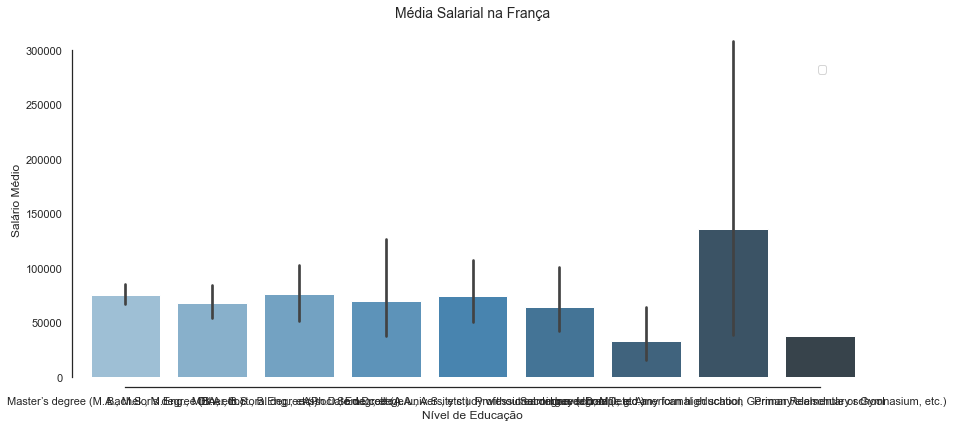

In [27]:
f, ax = plt.subplots(figsize=(14.0, 6.5))
sns.barplot(x='EdLevel', y='ConvertedComp', data=France, palette="Blues_d")
#, order=France['ConvertedComp'])
plt.title('Média Salarial na França', fontsize=14)
plt.xlabel('Nível de Educação')
plt.ylabel('Salário Médio')
sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(0.0, 0.8, 0.96, 0.1), loc='upper right')
plt.show()

In [4]:
#Renomeado as colunas
df = df.rename(columns={'Country/Region':'Country'})
df = df.rename(columns={'ObservationDate':'Date'})

#Calculando a quantidade de casos ativos
df['Active'] = df['Confirmed'] - (df['Recovered'] + df['Deaths'])

#Convertendo a coluna Date para data
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

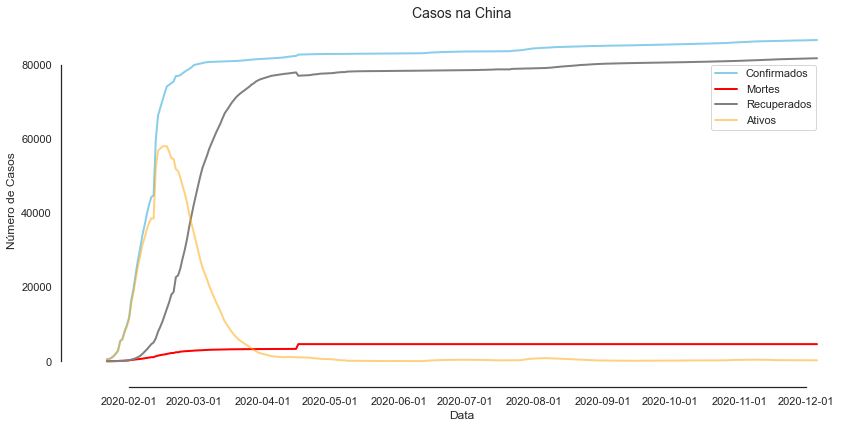

In [7]:
#Respondendo ao comportamento dos casos observando apenas a China
China = df.query("Country == 'Mainland China'")
China_Cases = China.groupby(['Date']).sum().reset_index()
f, ax = plt.subplots(figsize=(14.0, 6.5))
sns.lineplot(data=China_Cases, x="Date", y="Confirmed", color='skyblue', linewidth=2, label="Confirmados")
sns.lineplot(data=China_Cases, x="Date", y="Deaths", color='red', linewidth=2, label="Mortes")
sns.lineplot(data=China_Cases, x="Date", y="Recovered", color='gray', linewidth=2, label="Recuperados")
sns.lineplot(data=China_Cases, x="Date", y="Active", color='orange', alpha=0.5, linewidth=2, label="Ativos")
plt.title('Casos na China', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Número de Casos')
sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(0.0, 0.8, 0.96, 0.1), loc='upper right')
plt.show()

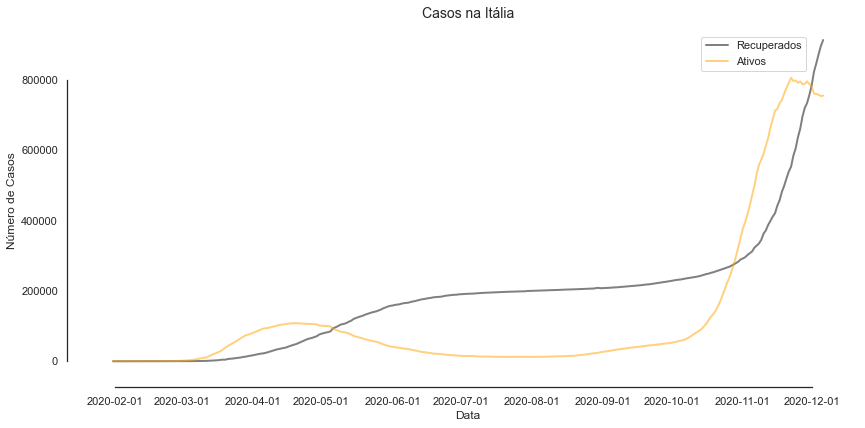

In [22]:
#Na Itália o número de recuperados ultrapassa o número de ativos em Maio
Italy = df.query("Country == 'Italy'")
Italy_Cases = Italy.groupby(['Date']).sum().reset_index()
f, ax = plt.subplots(figsize=(14.0, 6.5))
sns.lineplot(data=Italy_Cases, x="Date", y="Recovered", color='gray', linewidth=2, label="Recuperados")
sns.lineplot(data=Italy_Cases, x="Date", y="Active", color='orange', alpha=0.5, linewidth=2, label="Ativos")
plt.title('Casos na Itália', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Número de Casos')
sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(0.0, 0.88, 0.94, 0.1), loc='upper right')
plt.show()

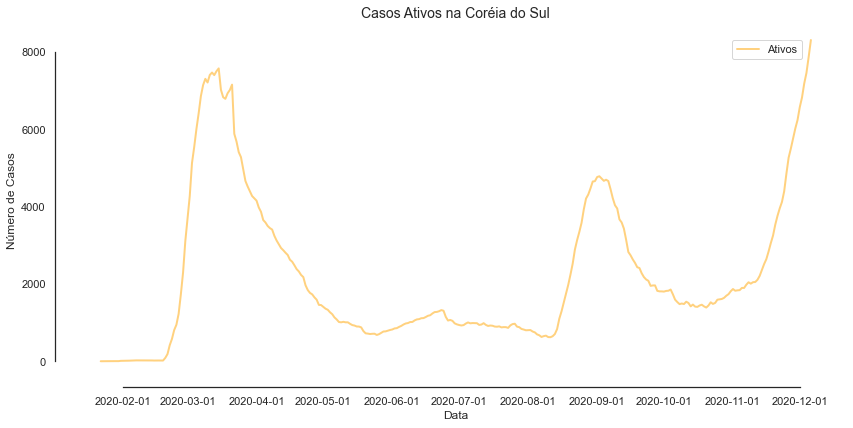

In [38]:
#Na Coréia do Sul o primeiro pico de casos ativos acontece em Março
Korea = df.query("Country == 'South Korea'")
Korea_Cases = Korea.groupby(['Date']).sum().reset_index()
f, ax = plt.subplots(figsize=(14.0, 6.5))
sns.lineplot(data=Korea_Cases, x="Date", y="Active", color='orange', alpha=0.5, linewidth=2, label="Ativos")
plt.title('Casos Ativos na Coréia do Sul', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Número de Casos')
sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(0.0, 0.87, 0.95, 0.1), loc='upper right')
plt.show()

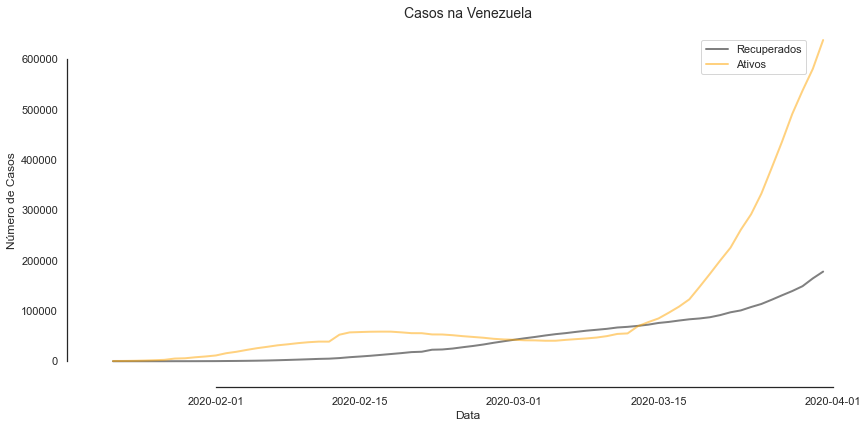

In [11]:
#Na Venezuela o número de casos recuperados ultrapassa o de ativos pela primeira vez em Março
#PS.: A resposta correta para o desafio originalmente foi Abril, porém com os dados atualizados isso pode ter sido alterado. 

Venezuela = df.query("Country == 'Venezuela'" and "Date < '2020-04-01'")
Venezuela_Cases = Venezuela.groupby(['Date']).sum().reset_index()
f, ax = plt.subplots(figsize=(14.0, 6.5))
sns.lineplot(data=Venezuela_Cases, x="Date", y="Recovered", color='gray', linewidth=2, label="Recuperados")
sns.lineplot(data=Venezuela_Cases, x="Date", y="Active", color='orange', alpha=0.5, linewidth=2, label="Ativos")
plt.title('Casos na Venezuela', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Número de Casos')
sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(0.0, 0.87, 0.94, 0.1), loc='upper right')
plt.show()